In [1]:
using CSV, Dates, DataFrames, Plots, Statistics, Interact

┌ Info: Recompiling stale cache file /home/roels/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/roels/.julia/compiled/v1.1/Interact/XmYW4.ji for Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1184


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-6373722181704117974\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-2076783844466007347\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/assetserver/b5253b386f522d7d0d4d275ccd9a0dccebdcb02f-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-6373722181704117974\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")

In [1]:
baseurl = "http://klapp.met.no/metnopub/production/metno"
s = [700,18700]
p = ["TA","PO"]; 

pstr = join(p,"&p=") 
sstr = join(s,"&s=")
fd = "01.01.2017"
td = "01.01.2018"


param = "?re=17&p=$pstr&fd=$fd&td=$td&nmt=0&ddel=dot&del=semicolon&ct=text/plain&s=$sstr&nod=line"
 
g = download(baseurl*param)


┌ Info: Recompiling stale cache file /home/roels/.julia/compiled/v1.1/CSV/HHBkp.ji for CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/roels/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-9478984730190229796\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-8155528666215946621\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/assetserver/15ffaef09c6581996e3c9c7ce400ef5d8e046a28-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-9478984730190229796\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  486k    0  486k    0     0  23911      0 --:--:--  0:00:20 --:--:-- 66549


"/tmp/julia38zMDt"

In [2]:
g ="/tmp/julia38zMDt"
df = CSV.read(g,types=[Int64, Int64, Int64,Int64,Int64,Float64,Float64])

,Stnr,Year,Month,Day,Time(UTC),TA,PO
,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,700,2017,1,1,0,-8.1,921.1
2,700,2017,1,1,1,-8.9,921.2
3,700,2017,1,1,2,-10.0,920.8
4,700,2017,1,1,3,-9.3,920.7
5,700,2017,1,1,4,-7.3,920.3
6,700,2017,1,1,5,-6.7,920.3
7,700,2017,1,1,6,-2.9,920.4
8,700,2017,1,1,7,-1.5,921.1
9,700,2017,1,1,8,-1.4,921.5


In [3]:
df[:DateTime] = DateTime.(df[:Year],df[:Month],df[:Day],df[Symbol("Time(UTC)")])

groupedbyStnr = groupby(df,:Stnr)
dtrange=1:240
POdiff = Dict()
TAdiff = Dict()
for station in groupedbyStnr
    POdiff[station[1,:Stnr]] =  [mean([mean(diff(station[start:step:24*90,:PO]).^2) for start in 1:1:step]) for step in dtrange]
    TAdiff[station[1,:Stnr]] =  [mean([mean(diff(station[start:step:24*90,:TA]).^2) for start in 1:1:step]) for step in dtrange]
end

In [4]:
-

┌ Warning: Accessing scope.id is deprecated; use scopeid(scope) instead.
│   caller = ip:0x0
└ @ Core :-1


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["var"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :span), Any[Node{DOM}(DOM(:html, :label), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text : key")))], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol,Any}(:attributes=>("data-bind"=>"foreach : options_js"),:className=>"buttons has-addons is-centered"))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[], Dict{Symbol,Any}())], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js"=>(Observable{Any} with 1 listeners. Value:
OrderedDict[OrderedDict{String,Any}("key"=>"TA","val"=>1,"id"=>"idFXDTBwln"), OrderedDict{String,Any}("key"=>"PO","val"=>2,"id"=>"idEYYDaMFC")], nothing),"index"=>(Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/roels/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/roels/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/roels/.julia/packages/InteractBase/l8cEC/src/../assets/all.js"), Asset("css", nothing, "/home/roels/.julia/packages/InteractBase/l8cEC/src/../assets/style.css"), Asset("css", nothing, "/home/roels/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js"=>Any[JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"options_js\":WebIO.getval({\"name\":\"options_js\",\"scope\":\"15547363820850567489\",\"id\":\"ob_05\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"15547363820850567489\",\"id\":\"ob_04\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel

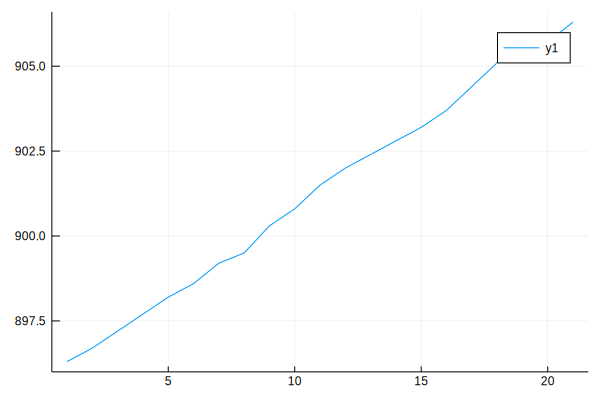

In [203]:
plot(groupedbyStnr[1][:PO][280:300])

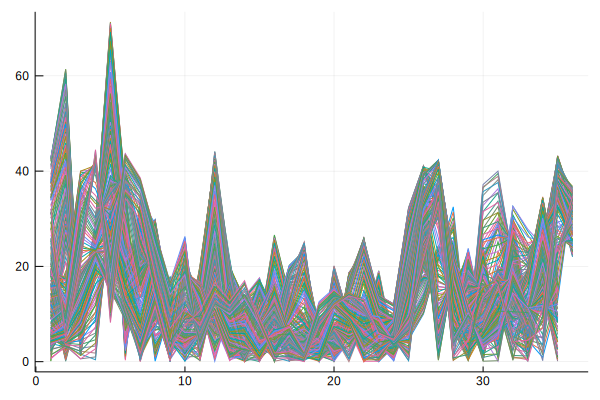

In [181]:
station = groupedbyStnr[1]
lag = 10*24
val = [sqrt.(diff(station[start:lag:end,:PO]).^2) for start in 1:lag]
plot(val,legend=false)

In [178]:
station

,Stnr,Year,Month,Day,Time(UTC),TA,PO
,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,18700,2017,1,1,0,-0.2,991.5
2,18700,2017,1,1,1,-1.2,991.4
3,18700,2017,1,1,2,-1.3,991.2
4,18700,2017,1,1,3,3.6,991.3
5,18700,2017,1,1,4,1.5,991.2
6,18700,2017,1,1,5,0.4,991.7
7,18700,2017,1,1,6,-0.9,991.9
8,18700,2017,1,1,7,-1.0,992.3
9,18700,2017,1,1,8,-2.0,992.7
